In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve,  average_precision_score
from sklearn.preprocessing import label_binarize



In [ ]:
digits = datasets.load_digits()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)


In [ ]:
classifier = svm.SVC(gamma=0.001)

In [ ]:
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

In [ ]:
predictions = classifier.predict(X_test)

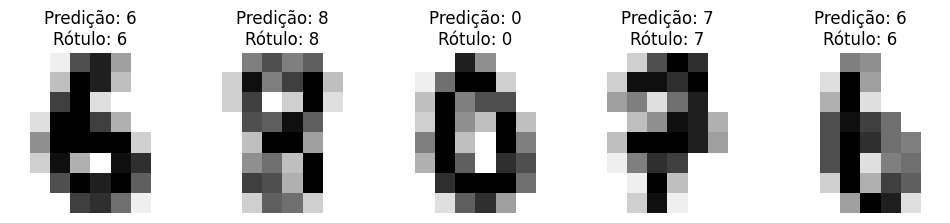

In [ ]:
num_images = 5
plt.figure(figsize=(12, 4))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Predição: {predictions[i]}\nRótulo: {y_test[i]}')
    plt.axis('off')

plt.show()

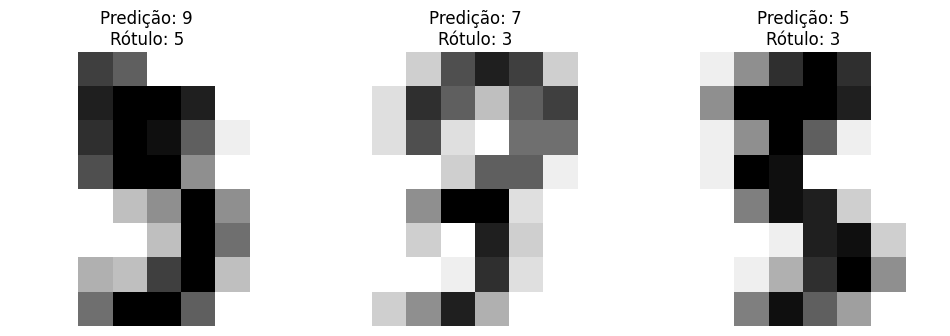

In [ ]:
incorrect_indices = [i for i in range(len(y_test)) if y_test[i] != predictions[i]]

# Visualizar classificações incorretas
num_images = min(5, len(incorrect_indices))
plt.figure(figsize=(12, 4))
for i in range(num_images):
    index = incorrect_indices[i]
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test[index].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Predição: {predictions[index]}\nRótulo: {y_test[index]}')
    plt.axis('off')

plt.show()

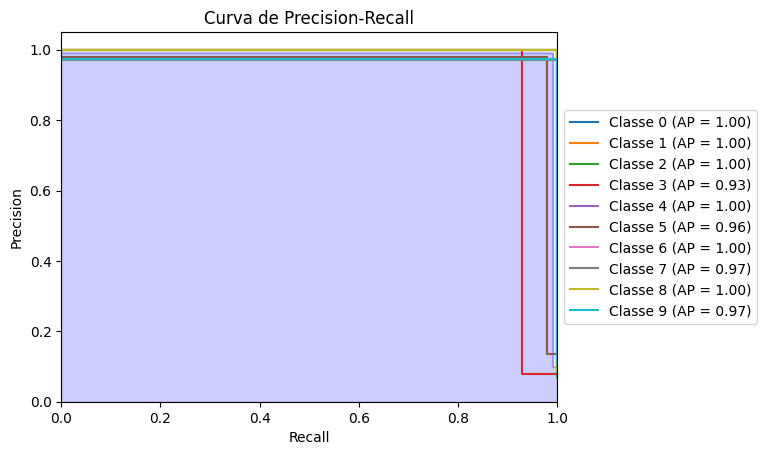

In [ ]:
# Transformar as previsões e rótulos em matrizes binárias
binary_predictions = label_binarize(predictions, classes=np.unique(digits.target))
binary_labels = label_binarize(y_test, classes=np.unique(digits.target))

# Calcular a precisão e recall para cada classe
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(digits.target_names)):
    precision[i], recall[i], _ = precision_recall_curve(binary_labels[:, i], binary_predictions[:, i])
    average_precision[i] = average_precision_score(binary_labels[:, i], binary_predictions[:, i])

# Calcular a média da precisão e recall de todas as classes
precision["micro"], recall["micro"], _ = precision_recall_curve(binary_labels.ravel(), binary_predictions.ravel())
average_precision["micro"] = average_precision_score(binary_labels, binary_predictions, average="micro")

# Plotar a curva Precision-Recall para cada classe
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')

for i in range(len(digits.target_names)):
    plt.step(recall[i], precision[i], where='post', label='Classe {0} (AP = {1:0.2f})'.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva de Precision-Recall')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
num_samples = len(X_test)
print("Quantidade de dados submetidos à classificação:", num_samples)
accuracy = classifier.score(X_test, y_test)
print("Acurácia:", accuracy)

Quantidade de dados submetidos à classificação: 360
Acurácia: 0.9916666666666667


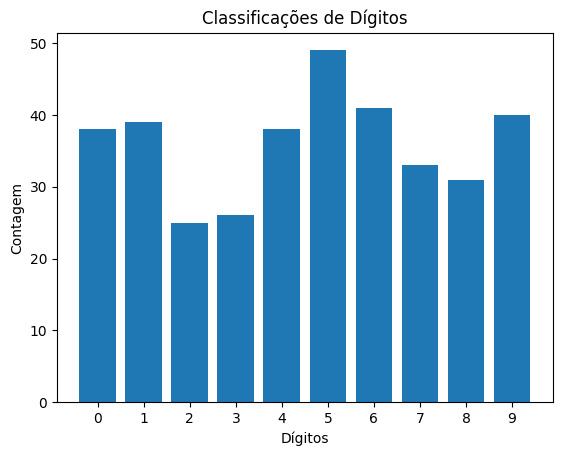

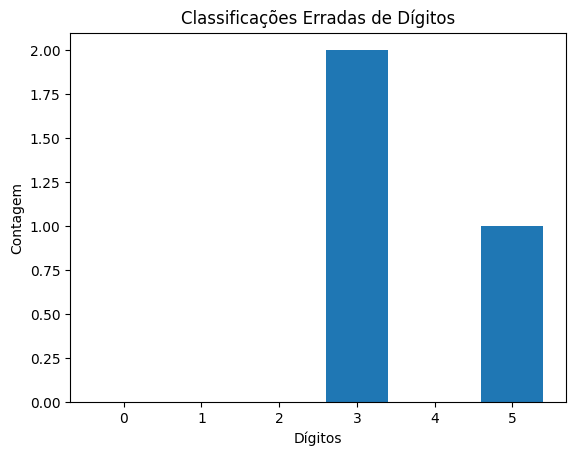

In [ ]:
# Contar o número de ocorrências de cada classe
class_counts = np.bincount(predictions)

# Criar uma lista de rótulos de classe
class_labels = np.arange(len(class_counts))

# Gerar o gráfico de barras
plt.bar(class_labels, class_counts)
plt.xlabel('Dígitos')
plt.ylabel('Contagem')
plt.title('Classificações de Dígitos')
plt.xticks(class_labels)
plt.show()

# Identificar as classificações erradas
incorrect_indices = np.where(y_test != predictions)[0]
incorrect_predictions = predictions[incorrect_indices]
incorrect_labels = y_test[incorrect_indices]

# Contar o número de ocorrências de cada classe nas classificações erradas
class_counts = np.bincount(incorrect_labels)

# Criar uma lista de rótulos de classe
class_labels = np.arange(len(class_counts))

# Gerar o gráfico de barras
plt.bar(class_labels, class_counts)
plt.xlabel('Dígitos')
plt.ylabel('Contagem')
plt.title('Classificações Erradas de Dígitos')
plt.xticks(class_labels)
plt.show()


<ipython-input-26-e87727c66107>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target, cmap=plt.cm.get_cmap("jet", 10))


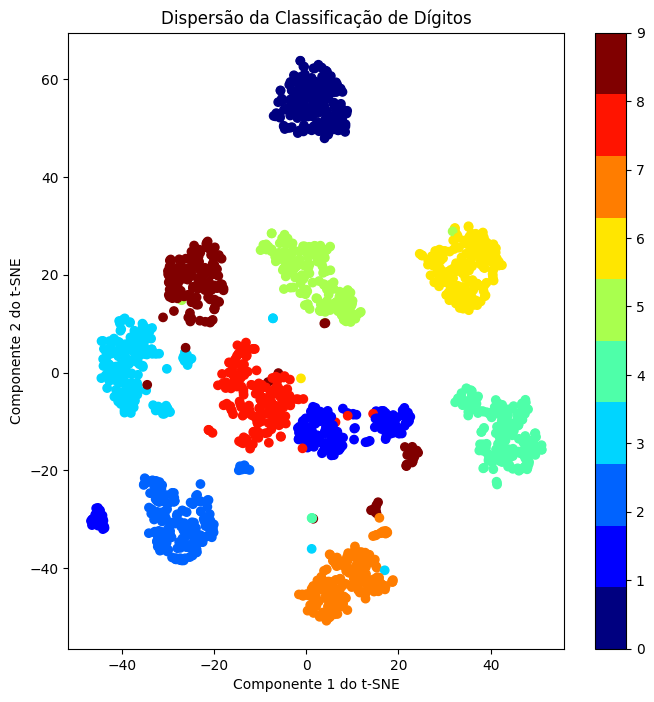

In [ ]:
# Aplicar o t-SNE para redução de dimensionalidade
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(digits.data)

# Plotar o gráfico de dispersão
plt.figure(figsize=(8, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=digits.target, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.title("Dispersão da Classificação de Dígitos")
plt.xlabel("Componente 1 do t-SNE")
plt.ylabel("Componente 2 do t-SNE")
plt.show()


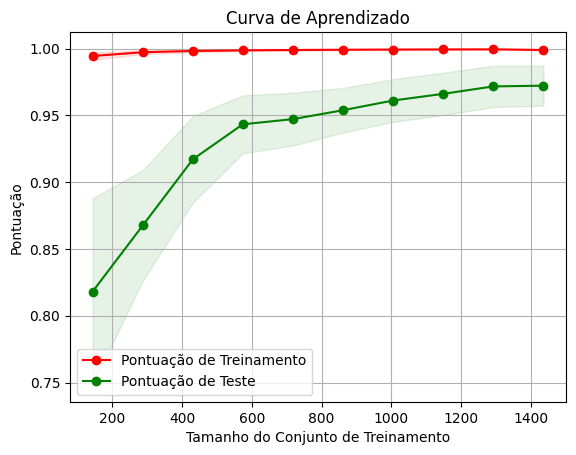

In [ ]:
# Definir tamanhos dos conjuntos de treinamento
train_sizes, train_scores, test_scores = learning_curve(
    estimator=classifier,
    X=digits.data,
    y=digits.target,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5
)

# Calcular as médias e desvios padrão dos escores de treinamento e teste
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar curva de aprendizado
plt.figure()
plt.title('Curva de Aprendizado')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Pontuação')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Pontuação de Treinamento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Pontuação de Teste')
plt.legend(loc='best')
plt.show()
